## 0. 教程大纲

### 0.1 图像基础
- 矩阵
- 分辨率
- 8位整型图像
- 浮点数图像

### 0.2 通道分离与合并
```python
b, g, r = cv.split(img)
img_new = cv.merge([b, g, r])
```

### 0.3 彩色图转灰度图
```python
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
```

### 0.4 二值化图像
```python
_, img_bin = cv.threshold(img_gray, th1, th2, cv.THRESH_BINARY)
```

### 0.5 图像运算
```python
img = cv.add(img1, img2)
img = cv.addWeighted(img1, alpha, img2, beta, gamma)
img = cv.subtract(img1, img2)
img = cv.multiply(img1, img2)
img = cv.divide(img1, img2)
```

### 0.6 图像像素非线性变换
```python
img = cv.convertScaleAbs(img, alpha=1, beta=0)
```
$$
s = b + kr
$$

$$
s = a + \frac{ln(r+1)}{b}
$$

$$
s = cr^\gamma
$$

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()

## 所学函数

In [ ]:
## 1. 图像读取
img = cv.imread()

## 2. 彩色图转灰度图
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

## 3. 二值化图像（灰度图转二值图）
_, img_bin = cv.threshold(img_gray, th1, th2, cv.THRESH_BINARY)

## 4. 保存图像
cv.imwrite('pic/bear_gray.jpg', img_gray)

## 5. 通道分离
b, g, r = cv.split(img)

## 6. 通道合并
img_new = cv.merge([b, g, r])

## 7. 两图像相加、相减、相乘、相除
img = cv.add(img1, img2)
img = cv.subtract(img1, img2)
img = cv.multiply(img1, img2)
img = cv.divide(img1, img2)

## 2. 图像基本知识

### 2.1 自定义图像

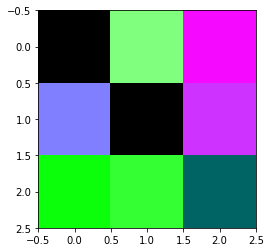

In [8]:
b = np.array([
    [0, 127, 255],
    [255, 0, 255],
    [10, 50, 100]
], dtype=np.uint8)

g = b.T
r = b - g

# show(b)
show(cv.merge([b, g, r]))

# cv.imwrite()

### 2.2 三种常见图像相互转换

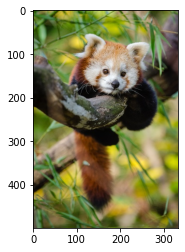

In [9]:
# 读取彩色图
img = cv.imread('pic/bear500x333.jpg')
# print(img)
show(img)

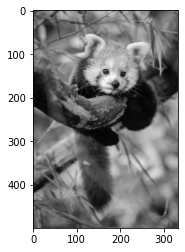

In [9]:
# 读取灰度图
# img_gray = cv.imread('pic/cat200x192.jpg', 0)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
show(img_gray)

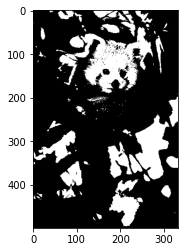

In [14]:
# 二值化图像
_, img_bin = cv.threshold(img_gray, 150, 255, cv.THRESH_BINARY)
show(img_bin)

In [15]:
# 保存图像
cv.imwrite('pic/bear_gray.jpg', img_gray)
cv.imwrite('pic/bear_bin.jpg', img_bin)

True

### 2.2 通道分离与合并

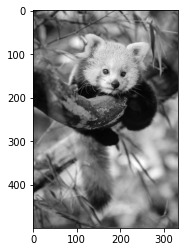

In [29]:
# 分离BGR通道

# r = img[:,:,0]
b, g, r = cv.split(img)
# b.shape
show(r)

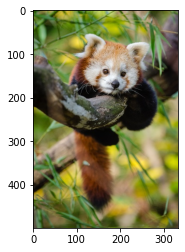

In [17]:
# 合并BGR通道
img_new = cv.merge([b, g, r])
show(img_new)

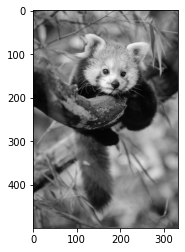

In [30]:
# rgb转灰度图
img_gray2 = 0.114*b + 0.587*g + 0.299*r
# img_gray2 = (0.299*r + 0.587*g + 0.114*b).astype(np.uint8)
show(img_gray2)

## 2. 加减乘除

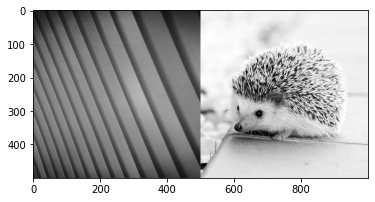

In [31]:
bg = cv.imread('pic/line500x500.jpg', 0)
ob = cv.imread('pic/hedgehog500x500.jpg', 0)

show(np.hstack([bg, ob]))

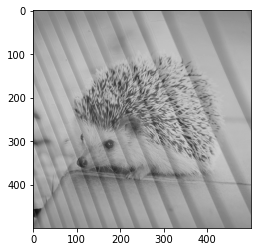

In [32]:
# 图像相加
# img_add = cv.add(bg*0.5, ob*0.5)
img_add = bg * 0.5 + ob * 0.5
show(img_add)

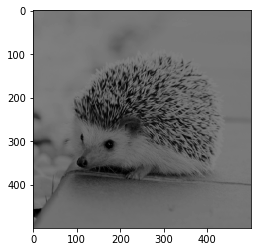

In [38]:
# 图像相减
# img_sub = img_add - bg * 0.5
img_sub = cv.subtract(img_add, bg * 0.5)
show(img_sub)

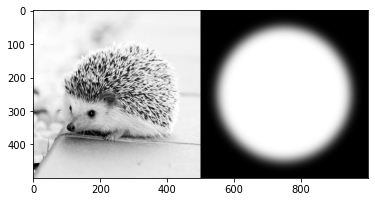

In [40]:
# 图像相乘
mask = cv.imread('pic/mask500x500.jpg', 0)
# mask /= 255

show(np.hstack([ob, mask]))

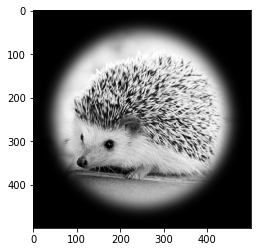

In [41]:
img_mul = cv.multiply(ob/1.0, mask/255)
show(img_mul)

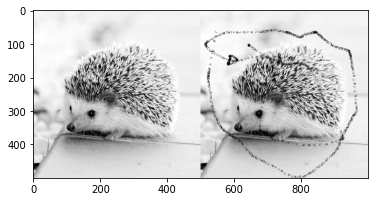

In [43]:
# 图像相除

ob_noise = cv.imread('pic/hedgehog_noise_500x500.jpg', 0)
show(np.hstack([ob, ob_noise]))

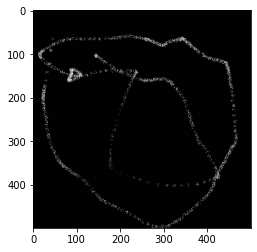

In [44]:
img_div = cv.divide(ob, ob_noise+1)
show(img_div)

In [45]:
cv.imwrite('pic/img_divide.jpg', np.hstack([ob, ob_noise, img_div]))

True

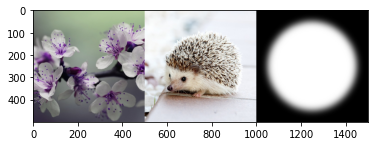

In [3]:
# 实例
bg = cv.imread('pic/petal500x500.jpg')
ob = cv.imread('pic/hedgehog500x500.jpg')
mask = cv.imread('pic/mask500x500.jpg')

show(np.hstack([bg, ob, mask]))

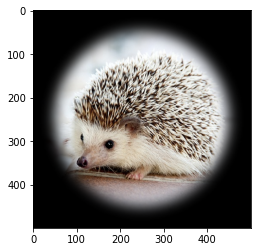

In [8]:
ob_select = np.float32(ob/1.0) * np.float32(mask/255.0)
show(np.uint8(ob_select))

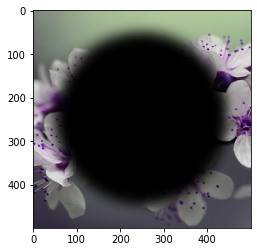

In [9]:
bg_select = np.float32(bg/1.0) * np.float32(1-mask/255.0)
show(np.uint8(bg_select))

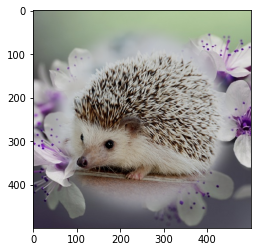

In [11]:
nice = cv.add(ob_select*0.8, bg_select).astype(np.uint8)
show(nice)

In [12]:
cv.imwrite('pic/image_mix.jpg', np.hstack([bg, ob, nice]))

True